In [1]:
import numpy as np
import matplotlib.pyplot as plt

import math
import statistics as stat
import collections

# 与えられたマトリックスリストから、円の点グラフを描画

In [2]:
def prot_weights(matrix_list,size,min,max):
  #min = -1.5
  #max = 1.5
  root = (max - min) / size
  #print(root)

  list = []
  for i in range(size):
    for j in range(size):
      x = min + j * root
      y = min + i * root

      if x * x + y * y > 1:
        list.append([x,y,"gray"])
      else:
        result = (matrix_list[0] * x + matrix_list[1] * y) / 2 + (matrix_list[2] * x + matrix_list[3] * y) / 2 - (matrix_list[4] * x + matrix_list[5] * y) / 2 - (matrix_list[6] * x + matrix_list[7] * y) / 2
        if result > 0:
          list.append([x,y,"red"])
        elif result < 0:
          list.append([x,y,"blue"])
        else:
          list.append([x,y,"black"])

  return list

In [3]:
def svo_prot_weights(matrix_list):
  #min = -1.5
  #max = 1.5
  root = (max - min) / size
  #print(root)


  #プロットするのは、円上の8点で
  svo_list = []

  list = []
  for i in range(size):
    for j in range(size):
      x = min + j * root
      y = min + i * root

      if x * x + y * y > 1:
        list.append([x,y,"gray"])
      else:
        result = (matrix_list[0] * x + matrix_list[1] * y) / 2 + (matrix_list[2] * x + matrix_list[3] * y) / 2 - (matrix_list[4] * x + matrix_list[5] * y) / 2 - (matrix_list[6] * x + matrix_list[7] * y) / 2
        if result > 0:
          list.append([x,y,"red"])
        elif result < 0:
          list.append([x,y,"blue"])
        else:
          list.append([x,y,"black"])

  return list    

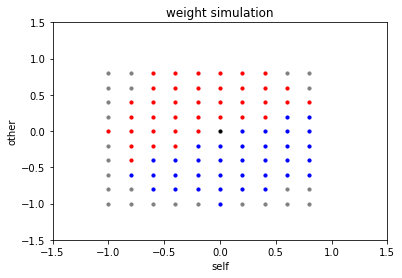

In [4]:
matrix_list_1 = [6,6,1,10,10,1,3,3]
weight_size = 10
min = -1.0
max = 1.0
result_list = prot_weights(matrix_list_1,weight_size,min,max)
#print(result_list)

#グラフで表示
plt.figure()

#plt.legend(loc='best')

plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])

for i in range(weight_size * weight_size):
    plt.scatter(result_list[i][0],result_list[i][1],c=result_list[i][2],s=10) #s は点のサイズ

plt.title('weight simulation')
plt.xlabel('self')
plt.ylabel('other')

plt.show()

# グラフテスト

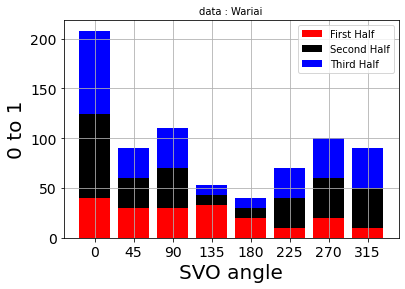

In [5]:
#https://ai-inter1.com/python-barchart/ 参考サイト

# データ準備
product_nm = np.array(["0", "45", "90","135", "180", "225", "270", "315"]) #角度 ラベルと分ければ、表示と使うのとで分けれるはず。
sales1 = np.array([40, 30, 30, 33, 20, 10, 20, 10]) # (1)First Half
sales2 = np.array([84, 30, 40, 10, 10, 30, 40, 40]) # (2)Second Half
sales3 = np.array([84, 30, 40, 10, 10, 30, 40, 40]) # (3)Third Half

# データ準備
#product_nm = ["0", "45", "90","135", "180", "225", "270", "315"] #角度
#sales1 = [40, 30, 30, 33, 20, 10, 20, 10] # (1)First Half
#sales2 = [84, 30, 40, 10, 10, 30, 40, 40] # (2)Second Half
#sales3 = [84, 30, 40, 10, 10, 30, 40, 40] # (3)Third Half
 
# グラフの装飾
plt.title("data : Wariai",
            fontsize = 10) # タイトル
plt.xlabel("SVO angle", fontsize = 20) # x軸ラベル
plt.ylabel("0 to 1", fontsize = 20) # y軸ラベル
plt.grid(True) # 目盛線表示
plt.tick_params(labelsize=14) # 目盛線ラベルサイズ


#left 必須、ｘ軸
#height 必須、高さ
# グラフ描画
plt.bar(product_nm, sales1,
            tick_label = product_nm, align="center",
            label="First Half", color = "red") # (3)First Half描画

plt.bar(product_nm, sales2, bottom = sales1,
            tick_label = product_nm, align="center",
            label="Second Half", color = "black") # (4)Second Half描画

plt.bar(product_nm, sales3, bottom = sales1 + sales2,
            tick_label = product_nm, align="center",
            label="Third Half", color = "blue") # (5)Third Half描画    
         

plt.legend(loc="upper right", fontsize=10) # (6)凡例表示
plt.show()

# グラフ表示

In [6]:
def matrix_CD(self_weight,other_weight,matrix_range):
  #
  C = 0
  D = 0
  Non = 0

  for a in range(matrix_range):
    for b in range(matrix_range):
      for c in range(matrix_range):
        for d in range(matrix_range):
          for e in range(matrix_range):
            for f in range(matrix_range):
              for g in range(matrix_range):
                for h in range(matrix_range):
                  #result = (float(a) * self_weight + float(b) * other_weight) / 2 + (float(c) * self_weight + float(d) * other_weight) / 2 - (float(e) * self_weight + float(f) * other_weight) / 2 - (float(g) * self_weight + float(h) * other_weight) / 2
                  result = (float(a+1) * self_weight + float(b+1) * other_weight) / 2 + (float(c+1) * self_weight + float(d+1) * other_weight) / 2 - (float(e+1) * self_weight + float(f+1) * other_weight) / 2 - (float(g+1) * self_weight + float(h+1) * other_weight) / 2
                  if result > 0:
                    C += 1
                  elif result < 0:
                    D += 1
                  else:
                    Non += 1

  total = C + D + Non
  #print("total = ",end="")
  #print(total)
  #C /= total
  #D /= total
  #Non /= total
  #arrayに変換した
  list = np.array([C,D,Non])

  return list                        


In [7]:
#サイズを小さくして、棒グラフで表示する
#C,D,Non のリストを返す

matrix_size = 4

self = 1.0
other = 0.0
self_manage = matrix_CD(self,other,matrix_size)
print(self_manage)

[27136 27136 11264]


In [8]:
self = math.sin(math.radians(45))
other = math.sin(math.radians(45))

# https://qiita.com/fist0/items/d0779ff861356dafaf95 参考サイト

#空配列で初期化
svo_1to4_list = np.empty((0,3),int)

#許容桁     15
round_size = 15

r = 0.0

for i in range(8):
  angle = 45 * i
  self = round(math.cos(math.radians(angle)),round_size)
  other = round(math.sin(math.radians(angle)),round_size)

  #self = r * self
  #other = r * other
  print(self,other)

  #マトリックス計算,CDの選択比率
  manage = matrix_CD(self,other,matrix_size)
  print(manage)

  #配列にしてから追加
  svo_1to4_list = np.append(svo_1to4_list,[manage],axis=0)


print(svo_1to4_list)

svo_trans = svo_1to4_list.transpose()
print(svo_trans)

1.0 0.0
[27136 27136 11264]
0.707106781186548 0.707106781186547
[32155 32091  1290]
0.0 1.0
[27136 27136 11264]
-0.707106781186547 0.707106781186548
[32145 32238  1153]
-1.0 0.0
[27136 27136 11264]
-0.707106781186548 -0.707106781186547
[32091 32155  1290]
-0.0 -1.0
[27136 27136 11264]
0.707106781186547 -0.707106781186548
[32238 32145  1153]
[[27136 27136 11264]
 [32155 32091  1290]
 [27136 27136 11264]
 [32145 32238  1153]
 [27136 27136 11264]
 [32091 32155  1290]
 [27136 27136 11264]
 [32238 32145  1153]]
[[27136 32155 27136 32145 27136 32091 27136 32238]
 [27136 32091 27136 32238 27136 32155 27136 32145]
 [11264  1290 11264  1153 11264  1290 11264  1153]]


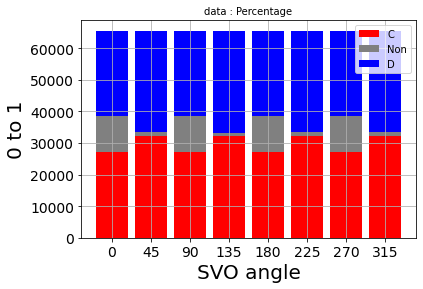

In [9]:
#データ
angle_list = np.array(["0", "45", "90","135", "180", "225", "270", "315"]) #角度

C_l = svo_trans[0]
Non_l = svo_trans[2]
D_l = svo_trans[1]

# グラフの装飾
plt.title("data : Percentage",
            fontsize = 10) # タイトル
plt.xlabel("SVO angle", fontsize = 20) # x軸ラベル
plt.ylabel("0 to 1", fontsize = 20) # y軸ラベル
plt.grid(True) # 目盛線表示
plt.tick_params(labelsize=14) # 目盛線ラベルサイズ
 
# グラフ描画
plt.bar(angle_list, C_l,
            tick_label = angle_list, align="center",
            label="C", color = "red") # (3)First Half描画

plt.bar(angle_list, Non_l, bottom = C_l,
            tick_label = angle_list, align="center",
            label="Non", color = "gray") # (4)Second Half描画

plt.bar(angle_list, D_l, bottom = C_l + Non_l,
            tick_label = angle_list, align="center",
            label="D", color = "blue") # (5)Third Half描画            

plt.legend(loc="upper right", fontsize=10) # (6)凡例表示
plt.show()

In [10]:
weight_list = []

for i in range(8):
  this_round_size = 15
  angle = 45 * i
  self = round(math.cos(math.radians(angle)),this_round_size)
  other = round(math.sin(math.radians(angle)),this_round_size)
  weight_list += [[self,other]]

print(weight_list)

def weight_CD(matrix_list):
  C = 0
  D = 0
  Non = 0

  for i in range(len(matrix_list)):
    a = matrix_list[0]
    b = matrix_list[1]
    c = matrix_list[2]
    d = matrix_list[3]
    e = matrix_list[4]
    f = matrix_list[5]
    g = matrix_list[6]
    h = matrix_list[7]

    for j in range(len(weight_list)):
      self_weight = weight_list[j][0]
      other_weight = weight_list[j][1]
      result = (float(a) * self_weight + float(b) * other_weight) / 2 + (float(c) * self_weight + float(d) * other_weight) / 2 - (float(e) * self_weight + float(f) * other_weight) / 2 - (float(g) * self_weight + float(h) * other_weight) / 2
      if result > 0:
        C += 1
      elif result < 0:
        D += 1
      else:
        Non += 1
        
  list = np.array([C,D,Non])

  return list        


[[1.0, 0.0], [0.707106781186548, 0.707106781186547], [0.0, 1.0], [-0.707106781186547, 0.707106781186548], [-1.0, 0.0], [-0.707106781186548, -0.707106781186547], [-0.0, -1.0], [0.707106781186547, -0.707106781186548]]


In [11]:
type_on_list = np.empty((0,3),int)

concord_l = [2,3,4,4,1,1,3,2]

concord_r = weight_CD(concord_l)
print(concord_r)

box = concord_r
type_on_list = np.append(type_on_list,[box],axis=0)


harmony_l = [3,2,4,4,1,1,2,3]

harmony_r = weight_CD(harmony_l)
print(harmony_r)

box = harmony_r
type_on_list = np.append(type_on_list,[box],axis=0)

peace_l = [3,1,4,4,2,2,1,3]

peace_r = weight_CD(peace_l)
print(peace_r)

box = peace_r
type_on_list = np.append(type_on_list,[box],axis=0)

compromise_l = [4,2,3,3,1,1,2,4]

compromise_r = weight_CD(compromise_l)
print(compromise_r)

box = compromise_r
type_on_list = np.append(type_on_list,[box],axis=0)

deadlock_l = [4,1,3,3,2,2,1,4]

deadlock_r = weight_CD(deadlock_l)
print(deadlock_r)

box = deadlock_r
type_on_list = np.append(type_on_list,[box],axis=0)

pdilemma_l = [1,4,3,3,2,2,4,1]

pdilemma_r = weight_CD(pdilemma_l)
print(pdilemma_r)

box = pdilemma_r
type_on_list = np.append(type_on_list,[box],axis=0)

assurance_l = [1,2,4,4,3,3,2,1]

assurance_r = weight_CD(assurance_l)
print(assurance_r)

box = assurance_r
type_on_list = np.append(type_on_list,[box],axis=0)

coordination_l = [2,1,4,4,3,3,1,2]

coordination_r = weight_CD(coordination_l)
print(coordination_r)

box = coordination_r
type_on_list = np.append(type_on_list,[box],axis=0)

staghunt_l = [1,3,4,4,2,2,3,1]

staghunt_r = weight_CD(staghunt_l)
print(staghunt_r)

box = staghunt_r
type_on_list = np.append(type_on_list,[box],axis=0)

hero_l = [4,3,2,2,1,1,3,4]

hero_r = weight_CD(hero_l)
print(hero_r)

box = hero_r
type_on_list = np.append(type_on_list,[box],axis=0)

battle_l = [3,4,2,2,1,1,4,3]

battle_r = weight_CD(battle_l)
print(battle_r)

box = battle_r
type_on_list = np.append(type_on_list,[box],axis=0)

chicken_l = [2,4,3,3,1,1,4,2]

chicken_r = weight_CD(chicken_l)
print(chicken_r)

box = chicken_r
type_on_list = np.append(type_on_list,[box],axis=0)

print(type_on_list)

type_trans = type_on_list.transpose()
print(type_trans)


[32 32  0]
[32 32  0]
[24 24 16]
[24 24 16]
[32 32  0]
[32 32  0]
[24 24 16]
[24 24 16]
[24 24 16]
[24 24 16]
[24 24 16]
[24 24 16]
[[32 32  0]
 [32 32  0]
 [24 24 16]
 [24 24 16]
 [32 32  0]
 [32 32  0]
 [24 24 16]
 [24 24 16]
 [24 24 16]
 [24 24 16]
 [24 24 16]
 [24 24 16]]
[[32 32 24 24 32 32 24 24 24 24 24 24]
 [32 32 24 24 32 32 24 24 24 24 24 24]
 [ 0  0 16 16  0  0 16 16 16 16 16 16]]


In [12]:

# a_info(list) : [ name,list,color ]
# graphs_info(list) : [ title,xlabel_name,ylabel_name,size_memo ]

def graphsF(base_list,a_info,b_info,c_info,graphs_info):
  # グラフの装飾
  plt.title(graphs_info[0],
            fontsize = 30) # タイトル
  plt.xlabel(graphs_info[1], fontsize = 20) # x軸ラベル 
  plt.ylabel(graphs_info[2], fontsize = 20) # y軸ラベル
  plt.grid(True) # 目盛線表示
  plt.tick_params(labelsize=graphs_info[3]) # 目盛線ラベルサイズ
  #plt.yaxis.set_ticks(np.arange(start, end, stepsize))
 
  # グラフ描画
  plt.bar(base_list, a_info[1],
            tick_label = base_list, align="center",
            label=a_info[0], color = a_info[2]) # (3)First Half描画

  plt.bar(base_list, b_info[1], bottom = a_info[1],
            tick_label = base_list, align="center",
            label=b_info[0], color = b_info[2]) # (4)Second Half描画

  plt.bar(base_list, c_info[1], bottom = a_info[1] + b_info[1],
            tick_label = base_list, align="center",
            label=c_info[0], color = c_info[2]) # (5)Third Half描画   

  plt.xticks(rotation=45, size='small')         

  plt.legend(loc="upper right", fontsize=10) # (6)凡例表示
  plt.show()




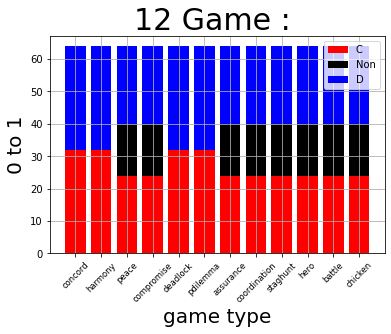

In [13]:
#データ
base_list = np.array(["concord", "harmony", "peace","compromise",
                       "deadlock", "pdilemma", "assurance", "coordination",
                       "staghunt","hero","battle","chicken"]) #

C_l = ["C",type_trans[0],"red"]
Non_l = ["Non",type_trans[2],"black"]
D_l = ["D",type_trans[1],"blue"]

graphs_info = ["12 Game : ","game type","0 to 1",10]

graphsF(base_list,C_l,Non_l,D_l,graphs_info)

# 傾きを調べてみた

In [14]:
def kata(matrix_list):

  a = matrix_list[0]
  b = matrix_list[1]
  c = matrix_list[2]
  d = matrix_list[3]
  e = matrix_list[4]
  f = matrix_list[5]
  g = matrix_list[6]
  h = matrix_list[7]

  #print()
  on = a + c - e - g
  #print(on)

  under = f + h - b - d
  #print(under)
  #print()

  if under == 0:
    if on == 0:
      ka = "1"
    elif on > 0:
      ka = "mugen"
    elif on < 0:
      ka = "-mugen"
  else:
    ka = on / under

  return ka


In [15]:
li_list = [concord_l,harmony_l,peace_l,compromise_l,
        deadlock_l,pdilemma_l,assurance_l,coordination_l,
        staghunt_l,hero_l,battle_l,chicken_l]

for i in range(len(li_list)):
  print(kata(li_list[i]))


-0.5
-2.0
mugen
mugen
2.0
0.5
-0.0
mugen
-0.0
mugen
-0.0
-0.0


条件を満たすマトリックスだったらそこに加算していく。

調整ゲーム（coorination,coordination）は例があるので、それと同じように、ルールを探してみよう。

# 調整ゲームの場合（coorination,coordination）

In [16]:

def matrix_CD_inRule(self_weight,other_weight,matrix_range):
  #
  C = 0
  D = 0
  Non = 0

  for a in range(matrix_range):
    for b in range(matrix_range):
      for c in range(matrix_range):
        for d in range(matrix_range):
          for e in range(matrix_range):
            for f in range(matrix_range):
              for g in range(matrix_range):
                for h in range(matrix_range):
                  if a > g and g > c and a > c and c > e and b > h and h > f and h > e:
                    #result = (float(a) * self_weight + float(b) * other_weight) / 2 + (float(c) * self_weight + float(d) * other_weight) / 2 - (float(e) * self_weight + float(f) * other_weight) / 2 - (float(g) * self_weight + float(h) * other_weight) / 2
                    result = (float(a+1) * self_weight + float(b+1) * other_weight) / 2 + (float(c+1) * self_weight + float(d+1) * other_weight) / 2 - (float(e+1) * self_weight + float(f+1) * other_weight) / 2 - (float(g+1) * self_weight + float(h+1) * other_weight) / 2

                    if result > 0:
                      C += 1
                    elif result < 0:
                      D += 1
                    else:
                      Non += 1

  total = C + D + Non
  #print("total = ",end="")
  #print(total)

  #C /= total
  #D /= total
  #Non /= total
  #arrayに変換した
  list = np.array([C,D,Non])

  return list                        


In [17]:

#空配列で初期化
svo_1to4_list_2 = np.empty((0,3),int)

#許容桁     15
round_size = 15

matrix_size = 4

for i in range(8):
  angle = 45 * i
  self = round(math.cos(math.radians(angle)),round_size)
  other = round(math.sin(math.radians(angle)),round_size)
  print(self,other)

  #マトリックス計算,CDの選択比率
  manage = matrix_CD_inRule(self,other,matrix_size)
  print(manage)

  #配列にしてから追加
  svo_1to4_list_2 = np.append(svo_1to4_list_2,[manage],axis=0)


print()
print(svo_1to4_list_2)
print()

svo_trans_2 = svo_1to4_list_2.transpose()
print(svo_trans_2)

1.0 0.0
[16  0  0]
0.707106781186548 0.707106781186547
[16  0  0]
0.0 1.0
[15  0  1]
-0.707106781186547 0.707106781186548
[12  4  0]
-1.0 0.0
[ 0 16  0]
-0.707106781186548 -0.707106781186547
[ 0 16  0]
-0.0 -1.0
[ 0 15  1]
0.707106781186547 -0.707106781186548
[ 4 12  0]

[[16  0  0]
 [16  0  0]
 [15  0  1]
 [12  4  0]
 [ 0 16  0]
 [ 0 16  0]
 [ 0 15  1]
 [ 4 12  0]]

[[16 16 15 12  0  0  0  4]
 [ 0  0  0  4 16 16 15 12]
 [ 0  0  1  0  0  0  1  0]]


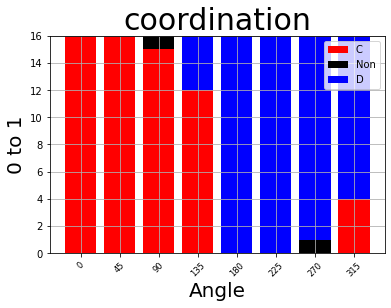

In [18]:
#データ
angle_list = np.array(["0", "45", "90","135", "180", "225", "270", "315"]) #角度

C_l_2 = ["C",svo_trans_2[0],"red"]
Non_l_2 = ["Non",svo_trans_2[2],"black"]
D_l_2 = ["D",svo_trans_2[1],"blue"]

graphs_info_2 = ["coordination","Angle","0 to 1",10]

graphsF(angle_list,C_l_2,Non_l_2,D_l_2,graphs_info_2)

# グラフの間隔を調整できるようにする

In [19]:
# https://pythondatascience.plavox.info/matplotlib/%E6%A3%92%E3%82%B0%E3%83%A9%E3%83%95
## グラフ関連のサイト

# a_info(list) : [ name,height_list,color ]
# graphs_info(list) : [ 0: title, 1: xlabel_name, 2: ylabel_name, 3: size_memo, 4: x_tick ]

def graphsG(base_list,a_info,b_info,c_info,graphs_info,start_angle=-180,end_angle=180):
  # グラフの装飾
  plt.title(graphs_info[0],
            fontsize = 30) # タイトル
  plt.xlabel(graphs_info[1], fontsize = 20) # x軸ラベル 
  plt.ylabel(graphs_info[2], fontsize = 20) # y軸ラベル
  plt.grid(False) # 目盛線表示
  plt.tick_params(length=0) # 目盛線

  #目盛線を消すサイト
  ## https://pythonmemo.hatenablog.jp/entry/2018/04/22/204614

  #plt.yaxis.set_ticks(np.arange(start, end, stepsize))
 
  # グラフ描画
  plt.bar(base_list, a_info[1],width=1,
            tick_label = graphs_info[4], align="center",
            label=a_info[0], color = a_info[2]) # (3)First Half描画

  plt.bar(base_list, b_info[1],width=1, bottom = a_info[1],
            tick_label = graphs_info[4], align="center",
            label=b_info[0], color = b_info[2]) # (4)Second Half描画

  plt.bar(base_list, c_info[1],width=1, bottom = a_info[1] + b_info[1],
            tick_label = graphs_info[4], align="center",
            label=c_info[0], color = c_info[2]) # (5)Third Half描画   

  plt.xticks(rotation=15, size='small')

  ## https://www.delftstack.com/ja/howto/matplotlib/how-to-plot-horizontal-and-vertical-line-in-matplotlib/
  plt.axvline(x = 57.15 - start_angle, ymin = 0.0, ymax = 1.0,linewidth = 0.5,color = "red", linestyle = "dashed")
  plt.axvline(x = 22.45 - start_angle, ymin = 0.0, ymax = 1.0,linewidth = 0.5,color = "red", linestyle = "dashed")
  plt.axvline(x = -12.04 - start_angle, ymin = 0.0, ymax = 1.0,linewidth = 0.5,color = "red", linestyle = "dashed")

  #plt.legend(loc="upper right", fontsize=10) # (6)凡例表示
  plt.legend(loc="best", fontsize=10) # (6)凡例表示
  plt.show()




In [20]:

#空配列で初期化
svo_1to4_list_3 = np.empty((0,3),int)

#許容桁     15
round_size = 15

#マトリックスの段階数
matrix_size = 4

#何度間隔で実行するか
step_size = 1

#角度の数、実行数
angle_N = int(360 / step_size)

#実施したいデータ
angle_list_3 = np.array([]) #角度


#表示する目盛りの間隔
tick_size = 45
#表示したい目盛り
tick_angle_list = np.array([])

for i in range(angle_N+1):
  angle = step_size * i - 180
  angle_list_3 = np.append(angle_list_3,[str(angle)])

  if angle % tick_size == 0:
    tick_angle_list = np.append(tick_angle_list,[str(angle)])
  else:
    tick_angle_list = np.append(tick_angle_list,[''])

  self = round(math.cos(math.radians(angle)),round_size)
  other = round(math.sin(math.radians(angle)),round_size)
  #print(self,other)

  #マトリックス計算,CDの選択比率
  manage = matrix_CD_inRule(self,other,matrix_size)
  #manage = matrix_CD(self,other,matrix_size)

  #manage = matrix_CD_inRule_2(self,other,matrix_size)
  #print(manage)

  #配列にしてから追加
  svo_1to4_list_3 = np.append(svo_1to4_list_3,[manage],axis=0)


print()
#print(angle_list_3)
#print(tick_angle_list)
print()
#print(svo_1to4_list_3)
print()

svo_trans_3 = svo_1to4_list_3.transpose()
print(svo_trans_3)




[[ 0  0  0 ...  0  0  0]
 [16 16 16 ... 16 16 16]
 [ 0  0  0 ...  0  0  0]]


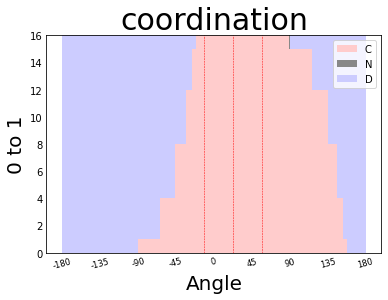

In [21]:
#データ
#angle_list = np.array(["0", "45", "90","135", "180", "225", "270", "315"]) #角度

#カラーコード
# # Red Grenn Blue : 16進数

C_l_3 = ["C",svo_trans_3[0],"#ffcccc"]
Non_l_3 = ["N",svo_trans_3[2],"#888888"]
D_l_3 = ["D",svo_trans_3[1],"#ccccff"]

graphs_info_3 = ["coordination","Angle","0 to 1",10,tick_angle_list]

graphsG(angle_list_3,C_l_3,Non_l_3,D_l_3,graphs_info_3,-180,180)

# 半径の大きさで見たい

In [22]:
# 半径 r、角度 angle

def rGraphsH(r_size,angle):
  
  #空配列で初期化
  svo_1to4_list_4 = np.empty((0,3),int)

  #許容桁     15
  round_size = 15

  #マトリックスの段階数
  matrix_size = 4

  #どれくらいの半径のサイズ間隔で実行するか
  step_size = r_size
  #print(step_size)

  #半径の数、実行数
  r_N = int(1 / step_size)
  #print(r_N)

  #実施したいデータ
  r_list_4 = np.array([]) #半径


  #表示する目盛りの間隔
  tick_size = 0.1
  #表示したい目盛り
  tick_r_list = np.array([])
  #print(tick_r_list)

  for i in range(r_N+1):
    r = round(step_size * i,round_size)
    r_list_4 = np.append(r_list_4,[str(r)])
    #print(r_list_4)

    if (r * 10) % (tick_size * 10) == 0:
      tick_r_list = np.append(tick_r_list,[str(r)])
    else:
      tick_r_list = np.append(tick_r_list,[''])

    self = round(r * math.cos(math.radians(angle)),round_size)
    other = round(r * math.sin(math.radians(angle)),round_size)
    #print(self,other)

    #self = r * self
    #other = r * other

    #マトリックス計算,CDの選択比率
    manage = matrix_CD_inRule(self,other,matrix_size)
    #manage = matrix_CD(self,other,matrix_size)
    #print(manage)

    #配列にしてから追加
    svo_1to4_list_4 = np.append(svo_1to4_list_4,[manage],axis=0)


  #print()
  #print(r_list_4)
  #print(tick_r_list)
  #print()
  #print(svo_1to4_list_4)
  #print()

  svo_trans_4 = svo_1to4_list_4.transpose()
  #print(svo_trans_4)

  #データ
  #angle_list = np.array(["0", "45", "90","135", "180", "225", "270", "315"]) #角度

  #カラーコード
  # # Red Grenn Blue : 16進数

  C_l_4 = ["C",svo_trans_4[0],"#ffcccc"]
  Non_l_4 = ["N",svo_trans_4[2],"#888888"]
  D_l_4 = ["D",svo_trans_4[1],"#ccccff"]
  #print(C_l_4)
  #print(tick_r_list)

  graphs_info_4 = [angle,"r_size","0 to 1",10,tick_r_list]

  graphsG(r_list_4,C_l_4,Non_l_4,D_l_4,graphs_info_4)

In [23]:
#for i in range(8):
#  rGraphsH(0.01,45*i)

In [24]:
def matrix_CD_inRule_2(self_weight,other_weight,matrix_range):
  #
  C = 0
  D = 0
  Non = 0

  rule_list = []
  momo = 1

  for a in range(matrix_range):
    for b in range(matrix_range):
      for c in range(matrix_range):
        for d in range(matrix_range):
          for e in range(matrix_range):
            for f in range(matrix_range):
              for g in range(matrix_range):
                for h in range(matrix_range):
                  if c > e and e > a and c > a and a > g and d > f and f > h and f > g:
                    #result = (float(a) * self_weight + float(b) * other_weight) / 2 + (float(c) * self_weight + float(d) * other_weight) / 2 - (float(e) * self_weight + float(f) * other_weight) / 2 - (float(g) * self_weight + float(h) * other_weight) / 2
                    result = (float(a+1) * self_weight + float(b+1) * other_weight) / 2 + (float(c+1) * self_weight + float(d+1) * other_weight) / 2 - (float(e+1) * self_weight + float(f+1) * other_weight) / 2 - (float(g+1) * self_weight + float(h+1) * other_weight) / 2
                    re_list = [[[a+1,b+1],[c+1,d+1]],
                               [[e+1,f+1],[g+1,h+1]]                               
                    ]

                    #if stat.multimode([a,b,c,d,e,f,g,h]) == [1,2,3,4]:

                    te = collections.Counter([a,b,c,d,e,f,g,h]).values()
                    #print(te)
                    #print([te[0],te[1],te[2],te[3]])
                    lyam = []
                          
                    for value in te:
                      lyam += [value]
                    #print(lyam)

                    if lyam == [2,2,2,2]:
                      print("Non tie :")
                    print(momo)
                    momo +=1
                    print(re_list[0])
                    print(re_list[1])
                    print()
                    #rule_list = np.append(rule_list,[re_list],axis=0)

                    if result > 0:
                      C += 1
                    elif result < 0:
                      D += 1
                    else:
                      Non += 1

  total = C + D + Non
  #print("total = ",end="")
  #print(total)

  #C /= total
  #D /= total
  #Non /= total
  #arrayに変換した
  list = np.array([C,D,Non])
  print(rule_list)

  return list,result_matrix


In [25]:
#print("Coodination :")
#ma = matrix_CD_inRule_2(0,0,matrix_size)

# ゲームタイプ別

マトリックスリストを受け取り、計算する。（条件で分配済み）

In [62]:
def matrix_CD_all(self_weight,other_weight,matrix_list):
  #
  C = 0
  D = 0
  Non = 0

  for i in range(len(matrix_list)):
    a = matrix_list[i][0]
    b = matrix_list[i][1]
    c = matrix_list[i][2]
    d = matrix_list[i][3]
    e = matrix_list[i][4]
    f = matrix_list[i][5]
    g = matrix_list[i][6]
    h = matrix_list[i][7]
    le = [[[a,b],[c,d]],[[e,f],[g,h]]]

    #print(le[0])
    #print(le[1])
    #print()

    result = (float(a+1) * self_weight + float(b+1) * other_weight) / 2 + (float(c+1) * self_weight + float(d+1) * other_weight) / 2 - (float(e+1) * self_weight + float(f+1) * other_weight) / 2 - (float(g+1) * self_weight + float(h+1) * other_weight) / 2

    if result > 0:
      C += 1
    elif result < 0:
      D += 1
    else:
      Non += 1

  total = C + D + Non
  #print("total = ",end="")
  #print(total)

  #C /= total
  #D /= total
  #Non /= total
  #arrayに変換した
  list = np.array([C,D,Non])

  return list

Coordination

[[3 2 1 0 0 0 2 1]
 [3 2 1 1 0 0 2 1]
 [3 2 1 2 0 0 2 1]
 [3 2 1 3 0 0 2 1]
 [3 3 1 0 0 0 2 1]
 [3 3 1 0 0 0 2 2]
 [3 3 1 0 0 1 2 2]
 [3 3 1 1 0 0 2 1]
 [3 3 1 1 0 0 2 2]
 [3 3 1 1 0 1 2 2]
 [3 3 1 2 0 0 2 1]
 [3 3 1 2 0 0 2 2]
 [3 3 1 2 0 1 2 2]
 [3 3 1 3 0 0 2 1]
 [3 3 1 3 0 0 2 2]
 [3 3 1 3 0 1 2 2]]



[[ 0  0  0 ...  0  0  0]
 [16 16 16 ... 16 16 16]
 [ 0  0  0 ...  0  0  0]]


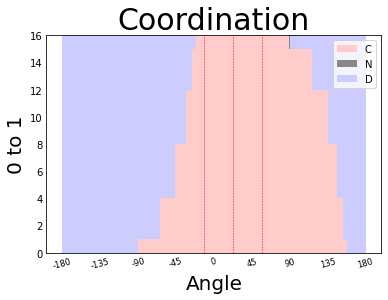

In [68]:
def Coordination_game():
  #空配列で初期化
  svo_1to4_list_3 = np.empty((0,3),int)

  #チェックリスト
  result_matrix = np.empty((0,8),int)

  #許容桁     15
  round_size = 15

  #マトリックスの段階数
  matrix_size = 4

  #何度間隔で実行するか
  step_size = 1

  #角度の数、実行数
  angle_N = int(360 / step_size)

  #実施したいデータ
  angle_list_3 = np.array([]) #角度


  #表示する目盛りの間隔
  tick_size = 45
  #表示したい目盛り
  tick_angle_list = np.array([])

  #属するマトリックス検索
  matrix_list = matrix_check_coordination(matrix_size)

  for i in range(angle_N+1):
    angle = step_size * i - 180
    angle_list_3 = np.append(angle_list_3,[str(angle)])

    if angle % tick_size == 0:
      tick_angle_list = np.append(tick_angle_list,[str(angle)])
    else:
      tick_angle_list = np.append(tick_angle_list,[''])

    self = round(math.cos(math.radians(angle)),round_size)
    other = round(math.sin(math.radians(angle)),round_size)
    #print(self,other)

    #マトリックス計算,CDの選択比率
    #manage,result_matrix = matrix_CD_Coordination(self,other,matrix_size)
    #manage = matrix_CD(self,other,matrix_size)

    manage = matrix_CD_all(self,other,matrix_list)

    #manage = matrix_CD_inRule_2(self,other,matrix_size)
    #print(manage)

    #配列にしてから追加
    svo_1to4_list_3 = np.append(svo_1to4_list_3,[manage],axis=0)

  print()
  #print(angle_list_3)
  #print(tick_angle_list)
  print()
  #print(svo_1to4_list_3)
  print()

  svo_trans_3 = svo_1to4_list_3.transpose()
  print(svo_trans_3)

  #データ
  #angle_list = np.array(["0", "45", "90","135", "180", "225", "270", "315"]) #角度

  #カラーコード
  # # Red Grenn Blue : 16進数

  C_l_3 = ["C",svo_trans_3[0],"#ffcccc"]
  Non_l_3 = ["N",svo_trans_3[2],"#888888"]
  D_l_3 = ["D",svo_trans_3[1],"#ccccff"]

  graphs_info_3 = ["Coordination","Angle","0 to 1",10,tick_angle_list]

  graphsG(angle_list_3,C_l_3,Non_l_3,D_l_3,graphs_info_3)

  #print(result_matrix)


def matrix_check_coordination(matrix_range):
  #チェックリスト
  check_list = {}
  result_matrix = np.empty((0,8),int)

  stag = []

  for a in range(matrix_range):
    for b in range(matrix_range):
      for c in range(matrix_range):
        for d in range(matrix_range):
          for e in range(matrix_range):
            for f in range(matrix_range):
              for g in range(matrix_range):
                for h in range(matrix_range):
                  if a > g and g > c and a > c and c > e and b > h and h > f and h > e:
                    le = [[[a,b],[c,d]],[[e,f],[g,h]]]
                    if le in stag == false:
                      stag = np.append(stag,[le],axis=0)
                    #print(le[0])
                    #print(le[1])
                    #print()

                    check = np.array([a,b,c,d,e,f,g,h])
                    key = tuple(check)
                    if key in check_list:
                      #print("ok")
                      pass
                    else:
                      #print("no")
                      check_list[key] = True
                      #print(check_list)
                      result_matrix = np.append(result_matrix,[check],axis=0)
                      #print(result_matrix)

  print(result_matrix)

  return result_matrix


def matrix_CD_Coordination(self_weight,other_weight,matrix_range):
  #チェックリスト
  check_list = {}
  result_matrix = np.empty((0,8),int)

  #
  C = 0
  D = 0
  Non = 0

  for a in range(matrix_range):
    for b in range(matrix_range):
      for c in range(matrix_range):
        for d in range(matrix_range):
          for e in range(matrix_range):
            for f in range(matrix_range):
              for g in range(matrix_range):
                for h in range(matrix_range):
                  if a > g and g > c and a > c and c > e and b > h and h > f and h > e:
                    le = [[[a,b],[c,d]],[[e,f],[g,h]]]
                    #print(le[0])
                    #print(le[1])
                    #print()

                    check = np.array([a,b,c,d,e,f,g,h])
                    key = tuple(check)
                    if key in check_list:
                      #print("ok")
                      pass
                    else:
                      #print("no")
                      check_list[key] = True
                      #print(check_list)
                      result_matrix = np.append(result_matrix,[check],axis=0)
                      #print(result_matrix)

                    #result = (float(a) * self_weight + float(b) * other_weight) / 2 + (float(c) * self_weight + float(d) * other_weight) / 2 - (float(e) * self_weight + float(f) * other_weight) / 2 - (float(g) * self_weight + float(h) * other_weight) / 2
                    result = (float(a+1) * self_weight + float(b+1) * other_weight) / 2 + (float(c+1) * self_weight + float(d+1) * other_weight) / 2 - (float(e+1) * self_weight + float(f+1) * other_weight) / 2 - (float(g+1) * self_weight + float(h+1) * other_weight) / 2

                    if result > 0:
                      C += 1
                    elif result < 0:
                      D += 1
                    else:
                      Non += 1

  total = C + D + Non
  #print("total = ",end="")
  #print(total)

  #C /= total
  #D /= total
  #Non /= total
  #arrayに変換した
  list = np.array([C,D,Non])

  return list,result_matrix                      


Coordination_game()

In [57]:
def chiken_game():
  #空配列で初期化
  svo_1to4_list_3 = np.empty((0,3),int)

  #チェックリスト
  result_matrix = np.empty((0,8),int)

  #許容桁     15
  round_size = 15

  #マトリックスの段階数
  matrix_size = 4

  #何度間隔で実行するか
  step_size = 1

  #角度の数、実行数
  angle_N = int(360 / step_size)

  #実施したいデータ
  angle_list_3 = np.array([]) #角度


  #表示する目盛りの間隔
  tick_size = 45
  #表示したい目盛り
  tick_angle_list = np.array([])

  #属するマトリックス検索
  matrix_list = matrix_check_chicken(matrix_size)

  for i in range(angle_N+1):
    angle = step_size * i - 180
    angle_list_3 = np.append(angle_list_3,[str(angle)])

    if angle % tick_size == 0:
      tick_angle_list = np.append(tick_angle_list,[str(angle)])
    else:
      tick_angle_list = np.append(tick_angle_list,[''])

    self = round(math.cos(math.radians(angle)),round_size)
    other = round(math.sin(math.radians(angle)),round_size)
    #print(self,other)

    #マトリックス計算,CDの選択比率
    #manage,result_matrix = matrix_CD_chicken(self,other,matrix_size)
    #manage = matrix_CD(self,other,matrix_size)

    manage = matrix_CD_all(self,other,matrix_list)

    #manage = matrix_CD_inRule_2(self,other,matrix_size)
    #print(manage)

    #配列にしてから追加
    svo_1to4_list_3 = np.append(svo_1to4_list_3,[manage],axis=0)


  print()
  #print(angle_list_3)
  #print(tick_angle_list)
  print()
  #print(svo_1to4_list_3)
  print()

  svo_trans_3 = svo_1to4_list_3.transpose()
  print(svo_trans_3)

  #データ
  #angle_list = np.array(["0", "45", "90","135", "180", "225", "270", "315"]) #角度

  #カラーコード
  # # Red Grenn Blue : 16進数

  C_l_3 = ["C",svo_trans_3[0],"#ffcccc"]
  Non_l_3 = ["N",svo_trans_3[2],"#888888"]
  D_l_3 = ["D",svo_trans_3[1],"#ccccff"]

  graphs_info_3 = ["chicken taka-hato","Angle","0 to 1",10,tick_angle_list]

  graphsG(angle_list_3,C_l_3,Non_l_3,D_l_3,graphs_info_3)

  #print(result_matrix)

chicken

In [58]:

def matrix_check_chicken(matrix_range):
  #チェックリスト
  check_list = {}
  result_matrix = np.empty((0,8),int)

  stag = []

  for a in range(matrix_range):
    for b in range(matrix_range):
      for c in range(matrix_range):
        for d in range(matrix_range):
          for e in range(matrix_range):
            for f in range(matrix_range):
              for g in range(matrix_range):
                for h in range(matrix_range):
                  if a == b and g == h and c == f and d == e and d > a and a > c and c > g:
                    le = [[[a,b],[c,d]],[[e,f],[g,h]]]
                    if le in stag == false:
                      stag = np.append(stag,[le],axis=0)
                    #print(le[0])
                    #print(le[1])
                    #print()

                    check = np.array([a,b,c,d,e,f,g,h])
                    key = tuple(check)
                    if key in check_list:
                      #print("ok")
                      pass
                    else:
                      #print("no")
                      check_list[key] = True
                      #print(check_list)
                      result_matrix = np.append(result_matrix,[check],axis=0)
                      #print(result_matrix)

  print(result_matrix)

  return result_matrix

def matrix_CD_chicken(self_weight,other_weight,matrix_range):
  #チェックリスト
  check_list = {}
  result_matrix = np.empty((0,8),int)

  #
  C = 0
  D = 0
  Non = 0

  for a in range(matrix_range):
    for b in range(matrix_range):
      for c in range(matrix_range):
        for d in range(matrix_range):
          for e in range(matrix_range):
            for f in range(matrix_range):
              for g in range(matrix_range):
                for h in range(matrix_range):
                  if a == b and g == h and c == f and d == e and d > a and a > c and c > g:
                  #if [a,b,c,d,e,f,g,h] == [2,2,1,3,3,1,0,0]:
                    le = [[[a,b],[c,d]],
                          [[e,f],[g,h]]]
                    #print(le[0])
                    #print(le[1])

                    check = np.array([a,b,c,d,e,f,g,h])
                    key = tuple(check)
                    if key in check_list:
                      #print("ok")
                      pass
                    else:
                      #print("no")
                      check_list[key] = True
                      #print(check_list)
                      result_matrix = np.append(result_matrix,[check],axis=0)
                      #print(result_matrix)

                    #result = (float(a) * self_weight + float(b) * other_weight) / 2 + (float(c) * self_weight + float(d) * other_weight) / 2 - (float(e) * self_weight + float(f) * other_weight) / 2 - (float(g) * self_weight + float(h) * other_weight) / 2
                    result = (float(a+1) * self_weight + float(b+1) * other_weight) / 2 + (float(c+1) * self_weight + float(d+1) * other_weight) / 2 - (float(e+1) * self_weight + float(f+1) * other_weight) / 2 - (float(g+1) * self_weight + float(h+1) * other_weight) / 2

                    if result > 0:
                      C += 1
                    elif result < 0:
                      D += 1
                    else:
                      Non += 1

  total = C + D + Non
  #print("total = ",end="")
  #print(total)

  #C /= total
  #D /= total
  #Non /= total
  #arrayに変換した
  list = np.array([C,D,Non])

  return list,result_matrix


[[2 2 1 3 3 1 0 0]]



[[0 0 0 ... 1 1 0]
 [0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 1]]


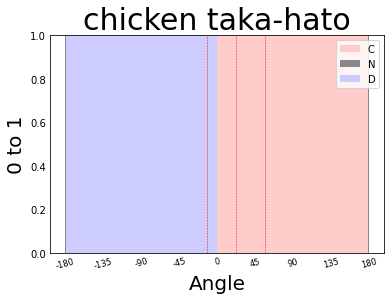

In [61]:
chiken_game()

[[2 2 0 1 1 0 1 1]
 [3 3 0 1 1 0 1 1]
 [3 3 0 2 2 0 1 1]
 [3 3 0 2 2 0 2 2]
 [3 3 1 2 2 1 2 2]]



[[1 1 1 ... 4 4 1]
 [1 4 4 ... 1 1 1]
 [3 0 0 ... 0 0 3]]


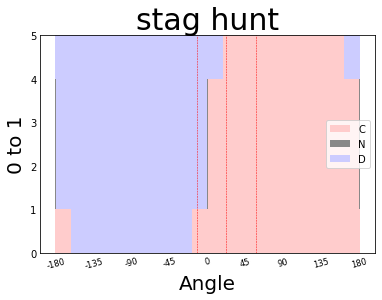

In [60]:
def staghunt_game(start_angle=-180,end_angle=180,matrix_size=4):
  #空配列で初期化
  svo_1to4_list_3 = np.empty((0,3),int)

  #チェックリスト
  result_matrix = np.empty((0,8),int)

  #許容桁     15
  round_size = 15

  #マトリックスの段階数
  #matrix_size = 4

  #何度間隔で実行するか
  step_size = 1

  #角度の数、実行数
  angle_N = int(360 / step_size)

  #開始数
  start = start_angle + 180
  if start > 360:
    print("error")
    return 0

  #終端数
  end = end_angle + 180
  if end < 0:
    print("error")
    return 0

  if end < start:
    print("error")
    return 0

  start = int(start / step_size)
  end = int(end / step_size)

  #実施したいデータ
  angle_list_3 = np.array([]) #角度


  #表示する目盛りの間隔
  tick_size = 45
  #表示したい目盛り
  tick_angle_list = np.array([])

  #属するマトリックス検索
  matrix_list = matrix_check_staghunt(matrix_size)
  #print(len(matrix_list))

  for i in range(start,end+1):
    angle = step_size * i - 180
    angle_list_3 = np.append(angle_list_3,[str(angle)])

    if angle % tick_size == 0:
      tick_angle_list = np.append(tick_angle_list,[str(angle)])
    else:
      tick_angle_list = np.append(tick_angle_list,[''])

    self = round(math.cos(math.radians(angle)),round_size)
    other = round(math.sin(math.radians(angle)),round_size)
    #print(self,other)

    #マトリックス計算,CDの選択比率
    #manage,result_matrix = matrix_CD_staghunt(self,other,matrix_size)
    #manage = matrix_CD(self,other,matrix_size)

    manage = matrix_CD_all(self,other,matrix_list)

    #manage = matrix_CD_inRule_2(self,other,matrix_size)
    #print(manage)

    #配列にしてから追加
    svo_1to4_list_3 = np.append(svo_1to4_list_3,[manage],axis=0)


  print()
  #print(angle_list_3)
  #print(tick_angle_list)
  print()
  #print(svo_1to4_list_3)
  print()

  svo_trans_3 = svo_1to4_list_3.transpose()
  print(svo_trans_3)

  #データ
  #angle_list = np.array(["0", "45", "90","135", "180", "225", "270", "315"]) #角度

  #カラーコード
  # # Red Grenn Blue : 16進数

  C_l_3 = ["C",svo_trans_3[0],"#ffcccc"]
  Non_l_3 = ["N",svo_trans_3[2],"#888888"]
  D_l_3 = ["D",svo_trans_3[1],"#ccccff"]

  graphs_info_3 = ["stag hunt","Angle","0 to 1",10,tick_angle_list]

  graphsG(angle_list_3,C_l_3,Non_l_3,D_l_3,graphs_info_3,start_angle,end_angle)

  #print(result_matrix)

def matrix_check_staghunt(matrix_range):
  #チェックリスト
  check_list = {}
  result_matrix = np.empty((0,8),int)

  stag = []

  for a in range(matrix_range):
    for b in range(matrix_range):
      for c in range(matrix_range):
        for d in range(matrix_range):
          for e in range(matrix_range):
            for f in range(matrix_range):
              for g in range(matrix_range):
                for h in range(matrix_range):
                  if a == b and g == h and c == f and d == e and a > d and d >= g and g > c:
                    le = [[[a,b],[c,d]],[[e,f],[g,h]]]
                    if le in stag == false:
                      stag = np.append(stag,[le],axis=0)
                    #print(le[0])
                    #print(le[1])
                    #print()

                    check = np.array([a,b,c,d,e,f,g,h])
                    key = tuple(check)
                    if key in check_list:
                      #print("ok")
                      pass
                    else:
                      #print("no")
                      check_list[key] = True
                      #print(check_list)
                      result_matrix = np.append(result_matrix,[check],axis=0)
                      #print(result_matrix)

  print(result_matrix)

  return result_matrix

def matrix_CD_staghunt(self_weight,other_weight,matrix_range):
  #チェックリスト
  check_list = {}
  result_matrix = np.empty((0,8),int)

  #
  C = 0
  D = 0
  Non = 0

  stag = []

  for a in range(matrix_range):
    for b in range(matrix_range):
      for c in range(matrix_range):
        for d in range(matrix_range):
          for e in range(matrix_range):
            for f in range(matrix_range):
              for g in range(matrix_range):
                for h in range(matrix_range):
                  if a == b and g == h and c == f and d == e and a > d and d >= g and g > c:
                    le = [[[a,b],[c,d]],[[e,f],[g,h]]]
                    if le in stag == false:
                      stag = np.append(stag,[le],axis=0)
                    #print(le[0])
                    #print(le[1])
                    #print()

                    check = np.array([a,b,c,d,e,f,g,h])
                    key = tuple(check)
                    if key in check_list:
                      #print("ok")
                      pass
                    else:
                      #print("no")
                      check_list[key] = True
                      #print(check_list)
                      result_matrix = np.append(result_matrix,[check],axis=0)
                      #print(result_matrix)

                    #result = (float(a) * self_weight + float(b) * other_weight) / 2 + (float(c) * self_weight + float(d) * other_weight) / 2 - (float(e) * self_weight + float(f) * other_weight) / 2 - (float(g) * self_weight + float(h) * other_weight) / 2
                    result = (float(a+1) * self_weight + float(b+1) * other_weight) / 2 + (float(c+1) * self_weight + float(d+1) * other_weight) / 2 - (float(e+1) * self_weight + float(f+1) * other_weight) / 2 - (float(g+1) * self_weight + float(h+1) * other_weight) / 2

                    if result > 0:
                      C += 1
                    elif result < 0:
                      D += 1
                    else:
                      Non += 1

  total = C + D + Non
  #print("total = ",end="")
  #print(total)

  #C /= total
  #D /= total
  #Non /= total
  #arrayに変換した
  list = np.array([C,D,Non])

  #print(stag)

  return list,result_matrix


staghunt_game()

[[1 1 0 3 3 0 2 2]]



[[1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


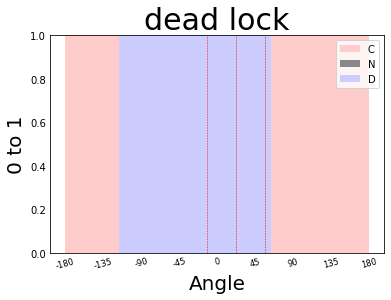

In [64]:
def deadlock_game():
  #空配列で初期化
  svo_1to4_list_3 = np.empty((0,3),int)

  #チェックリスト
  result_matrix = np.empty((0,8),int)

  #許容桁     15
  round_size = 15

  #マトリックスの段階数
  matrix_size = 4

  #何度間隔で実行するか
  step_size = 1

  #角度の数、実行数
  angle_N = int(360 / step_size)

  #実施したいデータ
  angle_list_3 = np.array([]) #角度


  #表示する目盛りの間隔
  tick_size = 45
  #表示したい目盛り
  tick_angle_list = np.array([])

  #属するマトリックス検索
  matrix_list = matrix_check_deadlock(matrix_size)

  for i in range(angle_N+1):
    angle = step_size * i - 180
    angle_list_3 = np.append(angle_list_3,[str(angle)])

    if angle % tick_size == 0:
      tick_angle_list = np.append(tick_angle_list,[str(angle)])
    else:
      tick_angle_list = np.append(tick_angle_list,[''])

    self = round(math.cos(math.radians(angle)),round_size)
    other = round(math.sin(math.radians(angle)),round_size)
    #print(self,other)

    #マトリックス計算,CDの選択比率
    #manage,result_matrix = matrix_CD_deadlock(self,other,matrix_size)
    #manage = matrix_CD(self,other,matrix_size)

    manage = matrix_CD_all(self,other,matrix_list)

    #manage = matrix_CD_inRule_2(self,other,matrix_size)
    #print(manage)

    #配列にしてから追加
    svo_1to4_list_3 = np.append(svo_1to4_list_3,[manage],axis=0)


  print()
  #print(angle_list_3)
  #print(tick_angle_list)
  print()
  #print(svo_1to4_list_3)
  print()

  svo_trans_3 = svo_1to4_list_3.transpose()
  print(svo_trans_3)

  #データ
  #angle_list = np.array(["0", "45", "90","135", "180", "225", "270", "315"]) #角度

  #カラーコード
  # # Red Grenn Blue : 16進数

  C_l_3 = ["C",svo_trans_3[0],"#ffcccc"]
  Non_l_3 = ["N",svo_trans_3[2],"#888888"]
  D_l_3 = ["D",svo_trans_3[1],"#ccccff"]

  graphs_info_3 = ["dead lock","Angle","0 to 1",10,tick_angle_list]

  graphsG(angle_list_3,C_l_3,Non_l_3,D_l_3,graphs_info_3)

  #print(result_matrix)


def matrix_check_deadlock(matrix_range):
  #チェックリスト
  check_list = {}
  result_matrix = np.empty((0,8),int)

  stag = []

  for a in range(matrix_range):
    for b in range(matrix_range):
      for c in range(matrix_range):
        for d in range(matrix_range):
          for e in range(matrix_range):
            for f in range(matrix_range):
              for g in range(matrix_range):
                for h in range(matrix_range):
                  if e > g and g > a and a > c and d > h and h > b and b > f:
                    le = [[[a,b],[c,d]],[[e,f],[g,h]]]
                    if le in stag == false:
                      stag = np.append(stag,[le],axis=0)
                    #print(le[0])
                    #print(le[1])
                    #print()

                    check = np.array([a,b,c,d,e,f,g,h])
                    key = tuple(check)
                    if key in check_list:
                      #print("ok")
                      pass
                    else:
                      #print("no")
                      check_list[key] = True
                      #print(check_list)
                      result_matrix = np.append(result_matrix,[check],axis=0)
                      #print(result_matrix)

  print(result_matrix)

  return result_matrix

def matrix_CD_deadlock(self_weight,other_weight,matrix_range):
  #チェックリスト
  check_list = {}
  result_matrix = np.empty((0,8),int)

  #
  C = 0
  D = 0
  Non = 0

  for a in range(matrix_range):
    for b in range(matrix_range):
      for c in range(matrix_range):
        for d in range(matrix_range):
          for e in range(matrix_range):
            for f in range(matrix_range):
              for g in range(matrix_range):
                for h in range(matrix_range):
                  if e > g and g > a and a > c and d > h and h > b and b > f:
                    le = [[[a,b],[c,d]],[[e,f],[g,h]]]
                    #print(le[0])
                    #print(le[1])
                    #print()
                    
                    check = np.array([a,b,c,d,e,f,g,h])
                    key = tuple(check)
                    if key in check_list:
                      #print("ok")
                      pass
                    else:
                      #print("no")
                      check_list[key] = True
                      #print(check_list)
                      result_matrix = np.append(result_matrix,[check],axis=0)
                      #print(result_matrix)

                    #result = (float(a) * self_weight + float(b) * other_weight) / 2 + (float(c) * self_weight + float(d) * other_weight) / 2 - (float(e) * self_weight + float(f) * other_weight) / 2 - (float(g) * self_weight + float(h) * other_weight) / 2
                    result = (float(a+1) * self_weight + float(b+1) * other_weight) / 2 + (float(c+1) * self_weight + float(d+1) * other_weight) / 2 - (float(e+1) * self_weight + float(f+1) * other_weight) / 2 - (float(g+1) * self_weight + float(h+1) * other_weight) / 2

                    if result > 0:
                      C += 1
                    elif result < 0:
                      D += 1
                    else:
                      Non += 1

  total = C + D + Non
  #print("total = ",end="")
  #print(total)

  #C /= total
  #D /= total
  #Non /= total
  #arrayに変換した
  list = np.array([C,D,Non])

  return list,result_matrix              


deadlock_game()

[[2 2 0 3 3 0 1 1]]



[[1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


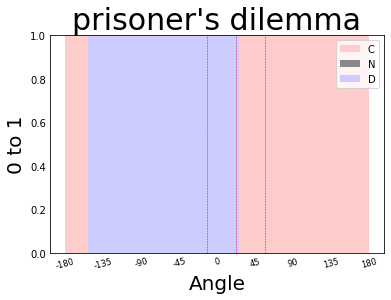

In [67]:
def PD_game(start_angle=-180,end_angle=180):
  #空配列で初期化
  svo_1to4_list_3 = np.empty((0,3),int)

  #チェックリスト
  result_matrix = np.empty((0,8),int)

  #許容桁     15
  round_size = 15

  #マトリックスの段階数
  matrix_size = 4

  #何度間隔で実行するか
  step_size = 1

  #角度の数、実行数
  angle_N = int(360 / step_size)

  #開始数
  start = start_angle + 180
  if start > 360:
    print("error")
    return 0

  #終端数
  end = end_angle + 180
  if end < 0:
    print("error")
    return 0

  if end < start:
    print("error")
    return 0

  start = int(start / step_size)
  end = int(end / step_size)

  #実施したいデータ
  angle_list_3 = np.array([]) #角度


  #表示する目盛りの間隔
  tick_size = 45
  #表示したい目盛り
  tick_angle_list = np.array([])

  #属するマトリックス検索
  matrix_list = matrix_check_PD(matrix_size)

  for i in range(start,end+1):
    angle = step_size * i - 180
    angle_list_3 = np.append(angle_list_3,[str(angle)])

    if angle % tick_size == 0:
      tick_angle_list = np.append(tick_angle_list,[str(angle)])
    else:
      tick_angle_list = np.append(tick_angle_list,[''])

    self = round(math.cos(math.radians(angle)),round_size)
    other = round(math.sin(math.radians(angle)),round_size)
    #print(self,other)

    #マトリックス計算,CDの選択比率
    #manage,result_matrix = matrix_CD_PD(self,other,matrix_size)
    #manage = matrix_CD(self,other,matrix_size)

    manage = matrix_CD_all(self,other,matrix_list)

    #manage = matrix_CD_inRule_2(self,other,matrix_size)
    #print(manage)

    #配列にしてから追加
    svo_1to4_list_3 = np.append(svo_1to4_list_3,[manage],axis=0)

  print()
  #print(angle_list_3)
  #print(tick_angle_list)
  print()
  #print(svo_1to4_list_3)
  print()

  svo_trans_3 = svo_1to4_list_3.transpose()
  print(svo_trans_3)

  #データ
  #angle_list = np.array(["0", "45", "90","135", "180", "225", "270", "315"]) #角度

  #カラーコード
  # # Red Grenn Blue : 16進数

  C_l_3 = ["C",svo_trans_3[0],"#ffcccc"]
  Non_l_3 = ["N",svo_trans_3[2],"#888888"]
  D_l_3 = ["D",svo_trans_3[1],"#ccccff"]

  graphs_info_3 = ["prisoner's dilemma","Angle","0 to 1",10,tick_angle_list]

  graphsG(angle_list_3,C_l_3,Non_l_3,D_l_3,graphs_info_3,start_angle,end_angle)

  #print(result_matrix)


def matrix_check_PD(matrix_range):
  #チェックリスト
  check_list = {}
  result_matrix = np.empty((0,8),int)

  stag = []

  for a in range(matrix_range):
    for b in range(matrix_range):
      for c in range(matrix_range):
        for d in range(matrix_range):
          for e in range(matrix_range):
            for f in range(matrix_range):
              for g in range(matrix_range):
                for h in range(matrix_range):
                  if a == b and g == h and c == f and d == e and d > a and a > g and g > c:
                    le = [[[a,b],[c,d]],[[e,f],[g,h]]]
                    if le in stag == false:
                      stag = np.append(stag,[le],axis=0)
                    #print(le[0])
                    #print(le[1])
                    #print()

                    check = np.array([a,b,c,d,e,f,g,h])
                    key = tuple(check)
                    if key in check_list:
                      #print("ok")
                      pass
                    else:
                      #print("no")
                      check_list[key] = True
                      #print(check_list)
                      result_matrix = np.append(result_matrix,[check],axis=0)
                      #print(result_matrix)

  print(result_matrix)

  return result_matrix


PD_game()

In [ ]:
def matrix_CD_PD(self_weight,other_weight,matrix_range):
  #チェックリスト
  check_list = {}
  result_matrix = np.empty((0,8),int)

  #
  C = 0
  D = 0
  Non = 0

  for a in range(matrix_range):
    for b in range(matrix_range):
      for c in range(matrix_range):
        for d in range(matrix_range):
          for e in range(matrix_range):
            for f in range(matrix_range):
              for g in range(matrix_range):
                for h in range(matrix_range):
                  if a == b and g == h and c == f and d == e and d > a and a > g and g > c:
                    le = [[[a,b],[c,d]],[[e,f],[g,h]]]
                    #print(le[0])
                    #print(le[1])
                    #print()

                    check = np.array([a,b,c,d,e,f,g,h])
                    key = tuple(check)
                    if key in check_list:
                      #print("ok")
                      pass
                    else:
                      #print("no")
                      check_list[key] = True
                      #print(check_list)
                      result_matrix = np.append(result_matrix,[check],axis=0)
                      #print(result_matrix)

                    #result = (float(a) * self_weight + float(b) * other_weight) / 2 + (float(c) * self_weight + float(d) * other_weight) / 2 - (float(e) * self_weight + float(f) * other_weight) / 2 - (float(g) * self_weight + float(h) * other_weight) / 2
                    result = (float(a+1) * self_weight + float(b+1) * other_weight) / 2 + (float(c+1) * self_weight + float(d+1) * other_weight) / 2 - (float(e+1) * self_weight + float(f+1) * other_weight) / 2 - (float(g+1) * self_weight + float(h+1) * other_weight) / 2

                    if result > 0:
                      C += 1
                    elif result < 0:
                      D += 1
                    else:
                      Non += 1

  total = C + D + Non
  #print("total = ",end="")
  #print(total)

  #C /= total
  #D /= total
  #Non /= total
  #arrayに変換した
  list = np.array([C,D,Non])

  return list,result_matrix    

In [33]:
check_list = {}
#print(check_list)
#miru = [44]
#table[tuple(miru)] = True
#print(table)
b = np.array([4,2,4,4,5,2,1,1])
key = tuple(b)
result_matrix = np.empty((0,8),int)
if key in table:
  print("yes")
else:
  print("no")
  table[key] = True
  print(table)
  hairetsu = np.append(hairetsu,[b],axis=0)
  print(hairetsu)

NameError: ignored